# Segmentation

Partitioning input image into meaningful sets of pixels. Usually used to find pixels with similarities in colour, intensity, texture or contours.

## RAG (Region Adjacency Graphs)
* Data structure used in segmentation
* Each region in image is represented as a graph node
* Edges defined between regions
* Weight of edge = difference between average colours of pixels in each region
* similar regions = low weight, dissimilar regions = high weight
* progressively merges adjacent regions of similar colour
* define the similarity with a threshold

In [1]:
from matplotlib import pyplot as plt

from skimage import data, io, segmentation, color
from skimage.future import graph
from skimage import io

https://www.pexels.com/photo/daylight-forest-glossy-lake-443446/

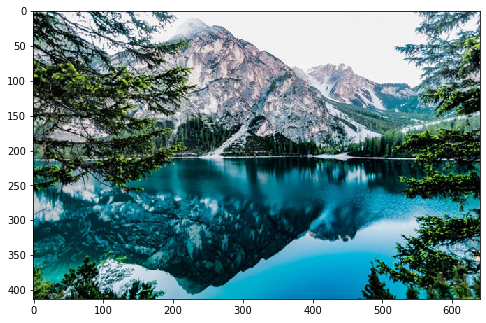

In [2]:
nature = io.imread('./images/pexels-nature.jpg') 

plt.figure(figsize=(8, 8))
plt.imshow(nature)

<b>Segmentation using Simple Linear Iterative Clustering (SLIC) which uses k-means clustering</b>
* <b>image</b> = input image
* <b>compactness</b> = balances the color-space proximity with image space-proximity, higher value gives more weight to the space proximity making the segments more square and cubic
* <b>n_segments</b> = number of segments to be created 

In [3]:
labels_1 = segmentation.slic(nature,
                            compactness=35, 
                            n_segments=500)
labels_1.shape

(413, 640)

In [4]:
labels_1

array([[  0,   0,   0, ...,  25,  25,  25],
       [  0,   0,   0, ...,  25,  25,  25],
       [  0,   0,   0, ...,  26,  26,  26],
       ...,
       [461, 461, 461, ..., 453, 453, 453],
       [461, 461, 461, ..., 453, 453, 453],
       [461, 461, 461, ..., 453, 453, 453]])

<b>color.label2rgb returns an RGB image where color-coded labels are painted over image.</b>

* <b>labels1</b>= integer arrays of labels with the same shape as image
* <b>image</b> = Image used as underlay for labels
* <b>kind</b> = The kind of color image desired. 'avg' replaces each labeled segment with its average color (for a pastel painting appearance), overlay to overlay colored blocks

http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.label2rgb

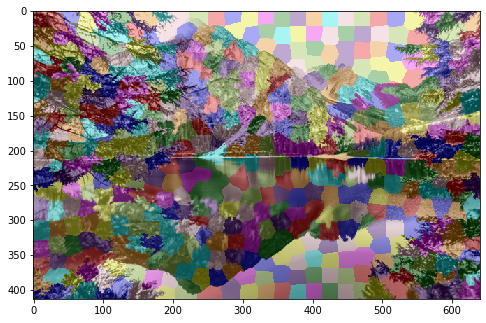

In [5]:
segmented_overlay = color.label2rgb(labels_1, nature, kind='overlay')

plt.figure(figsize=(8, 8))
plt.imshow(segmented_overlay)

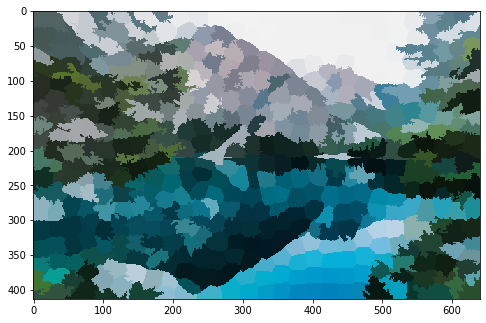

In [6]:
segmented_avg = color.label2rgb(labels_1, nature, kind='avg')

plt.figure(figsize=(8, 8))
plt.imshow(segmented_avg)

### Region Adjacency Graph (RAG) is used to find adjacency of regions with the graph

Find the weight between two regions using difference of mean color as their edge weight. Similar regions will have lower edge weight differences

In [7]:
g = graph.rag_mean_color(nature, labels_1)

####  cut_threshold removes the edges below a specified threshold.

Returns new labels array by combining regions whose nodes are separated by a weight less than the given threshold

In [10]:
# Change thresh to 15 and re-run these last 2 cells
labels_2 = graph.cut_threshold(labels_1, g, thresh = 50)

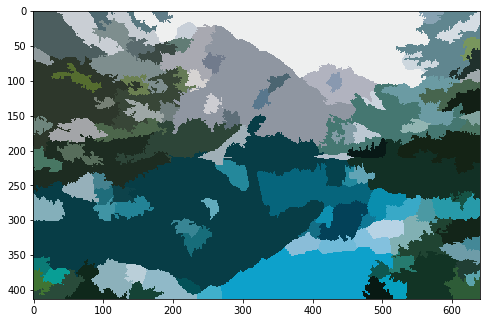

In [11]:
segmented_rag = color.label2rgb(labels_2, nature, kind='avg')

plt.figure(figsize=(8, 8))
plt.imshow(segmented_rag)